# Tissue Classification using Texture Features
In this lab we will explore the use of texture in images and traditional machine learning approaches such as clustering. The dataset we will be using is available here: http://dx.doi.org/10.5281/zenodo.53169. 

![alt text](https://www.researchgate.net/profile/Jakob_Kather/publication/303998214/figure/fig7/AS:391073710002224@1470250646407/Representative-images-from-our-dataset-Here-the-first-10-images-of-every-tissue-class.png)

The above figure shows the 8 different classes of tissue we will be trying to identify. 

## Step 1
* Load the data (done for you)
 * The "data" variable stores 5000 images of shape 150x150. This means data has shape (5000, 150, 150). These images are loaded here as grayscale.
 * The "labels" variable stores 5000 labels (0-7). This means "labels" has shape (5000,)
* Split data into training and testing subsets (left up to you)
 * Check out the sklearn function train_test_split from sklearn.model_selection

In [0]:
# Imports
from __future__ import print_function
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pylab as plt
import os
#import skimage.color
import skimage
from skimage.feature.texture import greycomatrix

In [0]:
#! git clone https://github.com/BeaverWorksMedlytics/Week3_public.git

# Build the path to the data folder. No need to change directories
# There are a total of 6 files you will have to load
data_dir = os.path.join( os.getcwd(), 'Week3_public', 'data', 'crc')

In [97]:
# Load data 
y = np.load(os.path.join(data_dir, 'rgb01.npz'))
labels = y['labels'][0:500]
data = y['rgb_data']
data = data[0:500:,:,:,0]
print(data.shape)
label_str = y['label_str']
label_str = label_str.tolist() # this is to convert label_str back to a dictionary
y = []

print(data.shape)
for ii in range(2,6):
    filename = os.path.join(data_dir, 'rgb0' + str(ii) + '.npz')
    print('loading ', filename)
    y = np.load(filename)
    labels = np.append(labels, y['labels'][0:500], axis=0)
    data = np.append(data, y['rgb_data'][0:500,:,:,0], axis=0)
    print(data.shape)
    y = []

data = data.astype('float')

print( data.shape )
print( labels.shape )

num_images, nrows, ncols = data.shape 

(500, 150, 150)
(500, 150, 150)
loading  /content/Week3_public/data/crc/rgb02.npz
(1000, 150, 150)
loading  /content/Week3_public/data/crc/rgb03.npz
(1500, 150, 150)
loading  /content/Week3_public/data/crc/rgb04.npz
(2000, 150, 150)
loading  /content/Week3_public/data/crc/rgb05.npz
(2500, 150, 150)
(2500, 150, 150)
(2500,)


In [0]:
# Use train_test_split to shuffle and split the data (look up the documentation if you need to)

# Your code here
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

TypeError: ignored

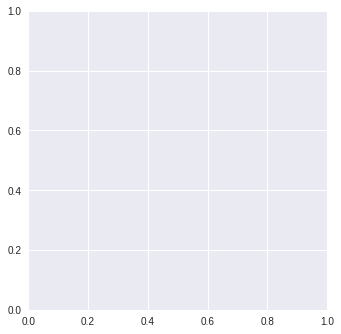

In [19]:
# show sample data
ii = 1
plt.figure()
plt.imshow(data[ii, ::])
plt.title(label_str[labels[ii]])
plt.gray()
plt.axis('off')
plt.show()

## Step 2
Next, we will generate features we will be using for classification. 

**First Approach :**
* Try using the raw images as input features in a k-means clustering algorithm and see how well it performs
* Colorspace transformation: Convert the RGB image into the LAB colorspace and use the *a* and *b* channels as features only. How well does this work ? 


In [0]:
#print(data.shape)
#for i in range(data.shape[0]):
#  r_mean = np.mean(data[i,:,:,0])
#  data[i,:,:,0].fill(r_mean) 
#  g_mean = np.mean(data[i,:,:,1])
#  data[i,:,:,1].fill(g_mean) 
#  b_mean = np.mean(data[i,:,:,2])
#  data[i,:,:,2].fill(b_mean) 
  #print(r_mean, g_mean, b_mean)
#replace pixels w mean of r g b sd etc

In [99]:
#skimage.feature.texture.greycomatrix(image, distances, angles, levels=256, symmetric=False, normed=False)
#initialize features train and test to empty, add to them,,,
for i in range(data.shape[0]):
  data2 = np.array((data.shape[0], 1))
  print(data[i,:,:,].shape)
  g_m = greycomatrix(data[i,:,:,].astype('uint8'), [2, 4], [0, np.pi/2])
  data2[i] = skimage.feature.greycoprops(g_m)
  #features_matrix = np.append(features_train, greycoprops(g_m, 'energy')) #what is features train
  

(150, 150)


ValueError: ignored

In [0]:
#local binary pattern
#lbp_train[h] = local_bin_patteern(X_train[h], P=16, R=2) what is P what is R what does lbp do
#do this @ home, run it before gclm to reduce size?

In [0]:
#for i in range(data.shape[0]):
  #greycomatrix(skimage.img_as_int(data[i,:,:,0]), [50], [5])

#  data[i,:,:,] = skimage.color.rgb2lab(data[i,:,:,])

In [72]:
# Try using raw data as the features
# First reshape the data into the correct format expected by KMeans() function
num_images, nrows, ncols, ncolors = data.shape
data = data.reshape((num_images, nrows*ncols*ncolors))
print(data.shape)


# Reshape X_train and X_test in the same way

# Your code here
num_images, nrows, ncols = X_train.shape
X_train = X_train.reshape((num_images, nrows*ncols))
num_images, nrows, ncols = X_test.shape
X_test = X_test.reshape((num_images, nrows*ncols))

(2500, 67500)


Now implement KMeans with the raw greyscale data. Skeleton code is provided below.

In [73]:
from sklearn.cluster import KMeans

# Training KMeans and predicting
#could fit on training and predict on testing (after split)
estimator = KMeans(n_clusters=8, max_iter=10)
clusters = estimator.fit_predict(data.astype('float'))

print('done')

done


We need to map the labels corresponding to the tissue types to the class IDs assigned by k-means clustering. Here, we use the ```mode``` function to map the assigned class IDs to the actual class labels.

In [0]:
from scipy.stats import mode

# Assign class predictions

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Calculate Accuracy and Conf. Matrix


0.492

To transform from RGB to LAB we will need to load the RGB data. The cell below does this for you. Then you need to convert the RGB images to LAB and remove the L dimension. Use rgb2lab from skimage.color to convert. 

In [49]:
# Load data and split into training, testing sets
y = np.load('rgb01.npz')
labels = y['labels']
data_rgb = y['rgb_data']
label_str = y['label_str']
label_str = label_str.tolist() # this is to convert label_str back to a dictionary
y = []

print(data_rgb.shape)
for ii in range(2,6):
    filename = 'rgb0' + str(ii) + '.npz'
    print('loading ', filename)
    y = np.load(filename)
    labels = np.append(labels, y['labels'], axis=0)
    data_rgb = np.append(data_rgb, y['rgb_data'])
    print(data_rgb.shape)
    y = []

data_rgb = data_rgb.astype('float')
data_rgb = data_rgb.reshape(5000, 150, 150, 3)

print( data_rgb.shape)
print( labels.shape )

num_images, nrows, ncols, dims = data_rgb.shape 

IOError: ignored

In [0]:
from skimage.color import rgb2lab

# Convert RGB to LAB

In [0]:
# Drop the L dimension

In [0]:
# Reshape and shuffle using train_test_split()

In [0]:
# Fit and predict using KMeans

In [0]:
# Assign class predictions

In [0]:
# Calculate accuracy and confusion matrix

## Step 3
Use k-means clustering to classify the images into 8 classes.

In [0]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=8, max_iter=10)
clusters = estimator.fit_predict(data.astype('float'))
print('done')

done


We need to map the labels corresponding to the tissue types to the class IDs assigned by k-means clustering. Here, we use the ```mode``` function to map the assigned class IDs to the actual class labels.

In [74]:
from scipy.stats import mode
pred_labels = np.zeros_like(clusters)
mask = (clusters == 0)

for i in range(8):
    mask = (clusters == i)
    pred_labels[mask] = mode(labels[mask])[0]

# Show a few classification resultse
ii = 10
plt.figure(figsize=(18, 16), dpi= 80)
for ii in range(8,16):
    plt.subplot(2,4,ii-8+1)
    plt.imshow(data[ii].reshape((150,150, 3)))
    plt.gray()
    plt.title('predicted:' + label_str[pred_labels[ii]] + '\n' +
              'expected:' + label_str[labels[ii]])
    plt.axis('off')

plt.show()


ValueError: ignored

## Step 4
Check the performance of the model

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(labels, pred_labels)
acc = accuracy_score(labels, pred_labels)
print(acc)
print(mat)

0.5792
[[431  20  49   0   0   0   0   0]
 [ 57 148  10  35   0   0   0   0]
 [135  11  97   0   0   7   0   0]
 [ 55  46   1 398   0   0   0   0]
 [105   7   5   8   0   0   0   0]
 [  0   0   1   0   0 374   0   0]
 [ 45  25   0 305   0   0   0   0]
 [  0   0   3   0   0 122   0   0]]


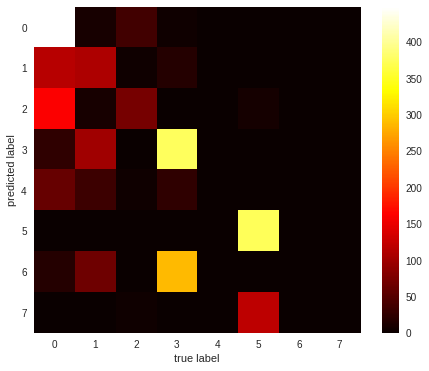

In [46]:
plt.figure(figsize=(8,6))
plt.imshow(mat, cmap='hot', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Assignment
Let's explore the use of different color and texture measures
* Use RGB images instead of grayscale images
* Histogram based features
* Colorspace conversion + histogram features
* Co-occurence matrix based texture measures
* Local binary patterns
* Perceptual features

Here we have lots of choices on how we can calculate various features and how we can combine them. 
* Try using first-order histogram features such as the mean, standard deviation, moments (scipy.stats.moments) as features
    * These features can be calculated on each channel of the RGB image as well as on any other colorspace that you transform the image into. Suggestion : use the LAB colorspace also and see how well/poorly it performs
* Use the Gray Level Co-Occurence Matrix (GLCM) based features for texture (skimage.feature.greycomatrix and skimage.feature.greycoprops) 
* Use Local Binay Patterns (LBP) for texture (skimage.feature.local_binary_pattern)
* Try combinations of the above features 

##### What do you observe here ? Which method performs the best ?



In [0]:
#54.8% with rgb
#replacing with mean: 55%
#rgb to lab %57.9